<font size="6"> Scraping Tweets using ntscraper and General Preprocessing  

In [1]:
from ntscraper import Nitter

scraper = Nitter()



Testing instances: 100%|██████████| 28/28 [00:42<00:00,  1.53s/it]


In [2]:
tweets = scraper.get_tweets('TSLA', mode='term', number=100, language='en')

30-Nov-23 15:03:26 - No instance specified, using random instance https://nitter.uni-sonia.com
30-Nov-23 15:03:33 - Current stats for TSLA: 15 tweets, 0 threads...
30-Nov-23 15:03:37 - Current stats for TSLA: 28 tweets, 0 threads...
30-Nov-23 15:03:43 - Current stats for TSLA: 41 tweets, 0 threads...
30-Nov-23 15:03:47 - Current stats for TSLA: 58 tweets, 0 threads...
30-Nov-23 15:03:52 - Current stats for TSLA: 72 tweets, 0 threads...
30-Nov-23 15:03:57 - Current stats for TSLA: 83 tweets, 0 threads...
30-Nov-23 15:04:02 - Current stats for TSLA: 95 tweets, 0 threads...
30-Nov-23 15:04:06 - Current stats for TSLA: 100 tweets, 0 threads...


In [3]:
scraped_tweet_list = []

for tweet in tweets['tweets']:
    data = [tweet['date'], tweet['text'], tweet['stats']['likes'], tweet['stats']['comments']]
    scraped_tweet_list.append(data)

In [4]:
scraped_tweet_list

[['Nov 30, 2023 · 8:55 PM UTC',
  'Tesla, $TSLA, Cybertruck has starting price of $61k excluding savings, and starts at $49k with probable savings',
  311,
  47],
 ['Nov 30, 2023 · 8:55 PM UTC',
  'BREAKING: $TSLA Cybertruck RWD starts at $60,990 ex-probable savings. Available 2025  AWD: $79,990 (Delivery 2024)  Cyberbeast: $99,990 (Delivery 2024)  https://www.tesla.com/cybertruck/design#payment',
  17,
  7],
 ['Nov 30, 2023 · 9:03 PM UTC',
  'Market closes out Nov with another a 520 point rally for the #DOW, with the Blue Chip index hitting a new high for 2023.  $CRM +9.4% helped out w/record revenue.  #NASDAQ -32 w/ $TSLA -1.7% after delivering its first #Cybertrucks. @KCBSRadio',
  0,
  0],
 ['Nov 30, 2023 · 9:03 PM UTC',
  '$TSLA Now that news is out of way and Shorts paid all day! Tmro we keep eye if it turns bullish!  #chartidea  Be it another lesson today not blindly trade thinking bullish into a catalyst. Nothing is obvious in market, follow your system.',
  0,
  1],
 ['Nov 30,

In [5]:
import pandas as pd

df = pd.DataFrame(scraped_tweet_list, columns=['date', 'text', 'Num_Likes', 'Num_Comments'])
df.head(10)

30-Nov-23 15:04:06 - NumExpr defaulting to 8 threads.


,date,text,Num_Likes,Num_Comments
0,"Nov 30, 2023 · 8:55 PM UTC","Tesla, $TSLA, Cybertruck has starting price of...",311,47
1,"Nov 30, 2023 · 8:55 PM UTC","BREAKING: $TSLA Cybertruck RWD starts at $60,9...",17,7
2,"Nov 30, 2023 · 9:03 PM UTC",Market closes out Nov with another a 520 point...,0,0
3,"Nov 30, 2023 · 9:03 PM UTC",$TSLA Now that news is out of way and Shorts p...,0,1
4,"Nov 30, 2023 · 8:56 PM UTC",THE CYBER TRUCK PRICING AND DELIVERY DATES ARE...,272,45
5,"Nov 30, 2023 · 8:56 PM UTC","$TSLA Cyber Truck Prices 🚨 EST. $99,990 CYBERB...",28,5
6,"Nov 30, 2023 · 9:03 PM UTC","#Cybertruck at 72 months 8% is $1,403/month, ...",0,0
7,"Nov 30, 2023 · 9:03 PM UTC",With 340 miles of range and a (still unconfirm...,0,0
8,"Nov 30, 2023 · 8:57 PM UTC",So Tesla's Cybertruck base price is more than ...,12,3
9,"Nov 30, 2023 · 8:51 PM UTC",BREAKING: Pricing for Tesla's $TSLA CyberTruc...,127,11


In [6]:
df = df.drop(columns=['date','Num_Likes', 'Num_Comments'])
df.head(10)

,text
0,"Tesla, $TSLA, Cybertruck has starting price of..."
1,"BREAKING: $TSLA Cybertruck RWD starts at $60,9..."
2,Market closes out Nov with another a 520 point...
3,$TSLA Now that news is out of way and Shorts p...
4,THE CYBER TRUCK PRICING AND DELIVERY DATES ARE...
5,"$TSLA Cyber Truck Prices 🚨 EST. $99,990 CYBERB..."
6,"#Cybertruck at 72 months 8% is $1,403/month, ..."
7,With 340 miles of range and a (still unconfirm...
8,So Tesla's Cybertruck base price is more than ...
9,BREAKING: Pricing for Tesla's $TSLA CyberTruc...


In [7]:
#!pip3 install tweet-preprocessor
#!pip3 install emoji

In [8]:
import re
import nltk
nltk.download('words')
import emoji 

def clean_tweets(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.EMOJI_DATA) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet

df['text'] = df['text'].map(lambda x: clean_tweets(x))
df.head(10)

[nltk_data] Downloading package words to
[nltk_data]     /Users/ashtonberret/nltk_data...
[nltk_data]   Package words is already up-to-date!


,text
0,"Tesla, $TSLA, Cybertruck has starting price of..."
1,"BREAKING: $TSLA Cybertruck RWD starts at $60,9..."
2,Market closes out Nov with another a 520 point...
3,$TSLA Now that news is out of way and Shorts p...
4,THE CYBER TRUCK PRICING AND DELIVERY DATES ARE...
5,"$TSLA Cyber Truck Prices EST. $99,990 CYBERBE..."
6,"Cybertruck at 72 months 8% is $1,403/month, sh..."
7,With 340 miles of range and a (still unconfirm...
8,So Tesla's Cybertruck base price is more than ...
9,BREAKING: Pricing for Tesla's $TSLA CyberTruck...


<font size="6"> Using Vader Sentiment Analysis to get Baseline Sentiment Scores

In [9]:
#!pip3 install vaderSentiment

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia
from tqdm import tqdm
analyzer = sia()
vader_results =  []
for i, row in tqdm(df.iterrows()):
    text = row['text']
    vader_results.append(analyzer.polarity_scores(text))
    
    

100it [00:00, 18304.55it/s]


In [11]:
vader_res_df = pd.DataFrame(vader_results)
vader_res_df.head(10)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
5,0.000,0.924,0.076,0.3680
6,0.000,0.827,0.173,0.5508
7,0.098,0.701,0.201,0.5697
8,0.000,0.641,0.359,0.8126
9,0.000,1.000,0.000,0.0000


In [12]:
import math 
sum_pos = vader_res_df['pos'].sum().round(5)
print(f'Sum of Positive Scores: {sum_pos}\n')

sum_neu = vader_res_df['neu'].sum().round(5)
print(f'Sum of Neutral Scores: {sum_neu}\n')

sum_neg = vader_res_df['neg'].sum().round(5)
print(f'Sum of Negative Scores: {sum_neg}\n')

total_sum = (sum_pos + sum_neu + sum_neg).round(5)

print(f'Total Sum: {total_sum}\n')

#The compound score is scaled from -1(negative) to 1(positive)
avg_compound_score = vader_res_df['compound'].mean().round(5)
print(f'The average Compound Score is: {avg_compound_score}')


Sum of Positive Scores: 7.276

Sum of Neutral Scores: 87.603

Sum of Negative Scores: 5.121

Total Sum: 100.0

The average Compound Score is: 0.11656


<font size="6"> Using a Pretrained Roberta Model to Improve Upon Vader Baseline

<font size="4"> The Roberta model'is able to incorporate the relationship between words in the text to analyze sentiment, whereas Vader creates a compound score that is simply a sum of the scores for each individual word in the text. 

In [13]:
from transformers import RobertaModel, RobertaTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


In [14]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

In [15]:
#Callback to vader scores for the example tweet
tweet_example = df['text'][0]
example_score = analyzer.polarity_scores(tweet_example)
print(tweet_example)
print(example_score)

Tesla, $TSLA, Cybertruck has starting price of $61k excluding savings, and starts at $49k with probable savings
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [16]:
def roberta_scorer(tweet_example):    
    encoded = tokenizer(tweet_example, return_tensors='pt')
    output = model(**encoded)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {
        'roberta-neg' : scores[0],
        'roberta-neu' : scores[1],
        'roberta-pos' : scores[2]
    }

    return scores_dict



In [17]:
roberta_results =  []
for i, row in tqdm(df.iterrows()):
    text = row['text']
    roberta_results.append(roberta_scorer(text))
    

100it [00:04, 21.59it/s]


In [18]:
roberta_res_df = pd.DataFrame(roberta_results)
roberta_res_df.head(10)

,roberta-neg,roberta-neu,roberta-pos
0,0.016784,0.771929,0.211287
1,0.028524,0.821175,0.150300
2,0.002246,0.180789,0.816965
3,0.026378,0.447654,0.525968
4,0.006636,0.746066,0.247298
5,0.057017,0.866776,0.076207
6,0.099188,0.718429,0.182383
7,0.002084,0.081006,0.916910
8,0.018165,0.182789,0.799045
9,0.007477,0.796111,0.196412


In [19]:
sum_pos = roberta_res_df['roberta-pos'].sum().round(5)
print(f'Sum of Positive Scores: {sum_pos}\n')

sum_neu = roberta_res_df['roberta-neu'].sum().round(5)
print(f'Sum of Neutral Scores: {sum_neu}\n')

sum_neg = roberta_res_df['roberta-neg'].sum().round(5)
print(f'Sum of Negative Scores: {sum_neg}\n')

total_sum = sum_pos + sum_neu + sum_neg

print(f'Total Sum: {total_sum.round(5)}')




Sum of Positive Scores: 32.87887954711914

Sum of Neutral Scores: 50.0661506652832

Sum of Negative Scores: 17.054969787597656

Total Sum: 100.0


<font size="6"> Vader and Roberta Comparison

In [20]:
combined_df = pd.concat([vader_res_df, roberta_res_df], axis=1)
combined_df.head(10)

,neg,neu,pos,compound,roberta-neg,roberta-neu,roberta-pos
0,0.000,1.000,0.000,0.0000,0.016784,0.771929,0.211287
1,0.000,1.000,0.000,0.0000,0.028524,0.821175,0.150300
2,0.000,1.000,0.000,0.0000,0.002246,0.180789,0.816965
3,0.000,1.000,0.000,0.0000,0.026378,0.447654,0.525968
4,0.000,1.000,0.000,0.0000,0.006636,0.746066,0.247298
5,0.000,0.924,0.076,0.3680,0.057017,0.866776,0.076207
6,0.000,0.827,0.173,0.5508,0.099188,0.718429,0.182383
7,0.098,0.701,0.201,0.5697,0.002084,0.081006,0.916910
8,0.000,0.641,0.359,0.8126,0.018165,0.182789,0.799045
9,0.000,1.000,0.000,0.0000,0.007477,0.796111,0.196412


In [21]:
combined_df.tail(10)

,neg,neu,pos,compound,roberta-neg,roberta-neu,roberta-pos
90,0.000,0.692,0.308,0.8360,0.004039,0.180630,0.815332
91,0.000,0.933,0.067,0.3612,0.019172,0.756399,0.224429
92,0.000,1.000,0.000,0.0000,0.004811,0.571047,0.424142
93,0.178,0.693,0.129,-0.6090,0.325851,0.570490,0.103659
94,0.000,0.948,0.052,0.3680,0.074487,0.841232,0.084281
95,0.000,1.000,0.000,0.0000,0.005162,0.241935,0.752903
96,0.000,1.000,0.000,0.0000,0.011819,0.862714,0.125467
97,0.000,0.762,0.238,0.3612,0.011367,0.773805,0.214828
98,0.000,1.000,0.000,0.0000,0.281941,0.644657,0.073402
99,0.000,0.440,0.560,0.6249,0.002428,0.031793,0.965778


In [22]:
combined_df.__len__

<bound method DataFrame.__len__ of     neg    neu    pos  compound  roberta-neg  roberta-neu  roberta-pos
0   0.0  1.000  0.000    0.0000     0.016784     0.771929     0.211287
1   0.0  1.000  0.000    0.0000     0.028524     0.821175     0.150300
2   0.0  1.000  0.000    0.0000     0.002246     0.180789     0.816965
3   0.0  1.000  0.000    0.0000     0.026378     0.447654     0.525968
4   0.0  1.000  0.000    0.0000     0.006636     0.746066     0.247298
..  ...    ...    ...       ...          ...          ...          ...
95  0.0  1.000  0.000    0.0000     0.005162     0.241935     0.752903
96  0.0  1.000  0.000    0.0000     0.011819     0.862714     0.125467
97  0.0  0.762  0.238    0.3612     0.011367     0.773805     0.214828
98  0.0  1.000  0.000    0.0000     0.281941     0.644657     0.073402
99  0.0  0.440  0.560    0.6249     0.002428     0.031793     0.965778

[100 rows x 7 columns]>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

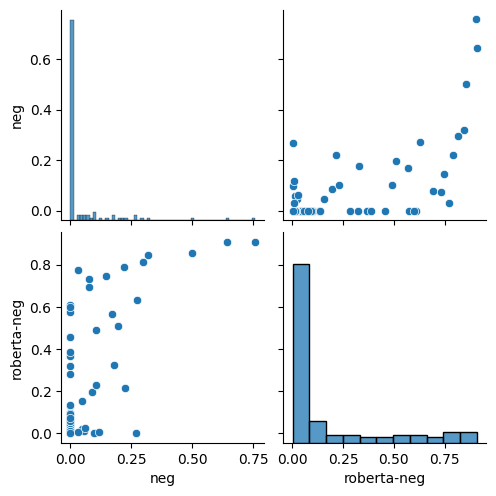

In [24]:
sns.pairplot(data=combined_df, vars=['neg', 'roberta-neg'])

plt.show()

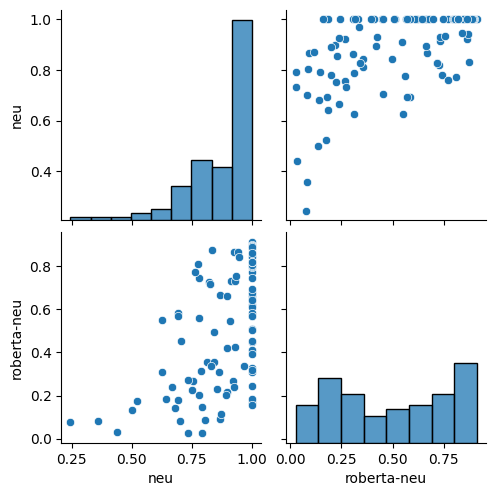

In [25]:
sns.pairplot(data=combined_df, vars=['neu', 'roberta-neu'])

plt.show()

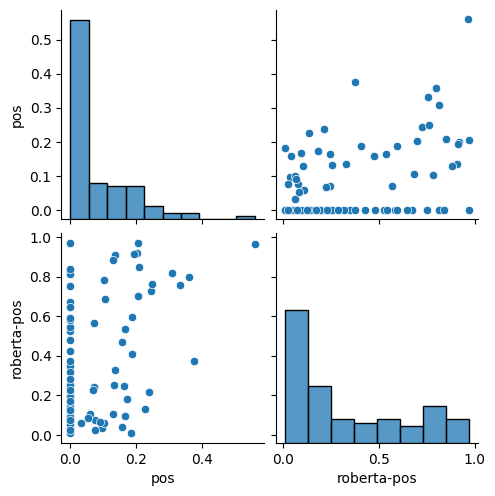

In [26]:
sns.pairplot(data=combined_df, vars=['pos', 'roberta-pos'])

plt.show()

In [27]:
#bar plot to plot the average neg, neutral and pos scores 

#vader
avg_pos_vader = vader_res_df['pos'].sum().mean().round(5)
print(avg_pos_vader)
avg_neu_vader = vader_res_df['neu'].sum().mean().round(5)
print(avg_neu_vader)
avg_neg_vader = vader_res_df['neg'].sum().mean().round(5)
print(avg_neg_vader)

#roberta
avg_pos_roberta = roberta_res_df['roberta-pos'].sum().mean().round(5)
print(avg_pos_roberta)
avg_neu_roberta= roberta_res_df['roberta-neu'].sum().mean().round(5)
print(avg_neu_roberta)
avg_neg_roberta = roberta_res_df['roberta-neg'].sum().mean().round(5)
print(avg_neg_roberta)


7.276
87.603
5.121
32.87888
50.06615
17.05497


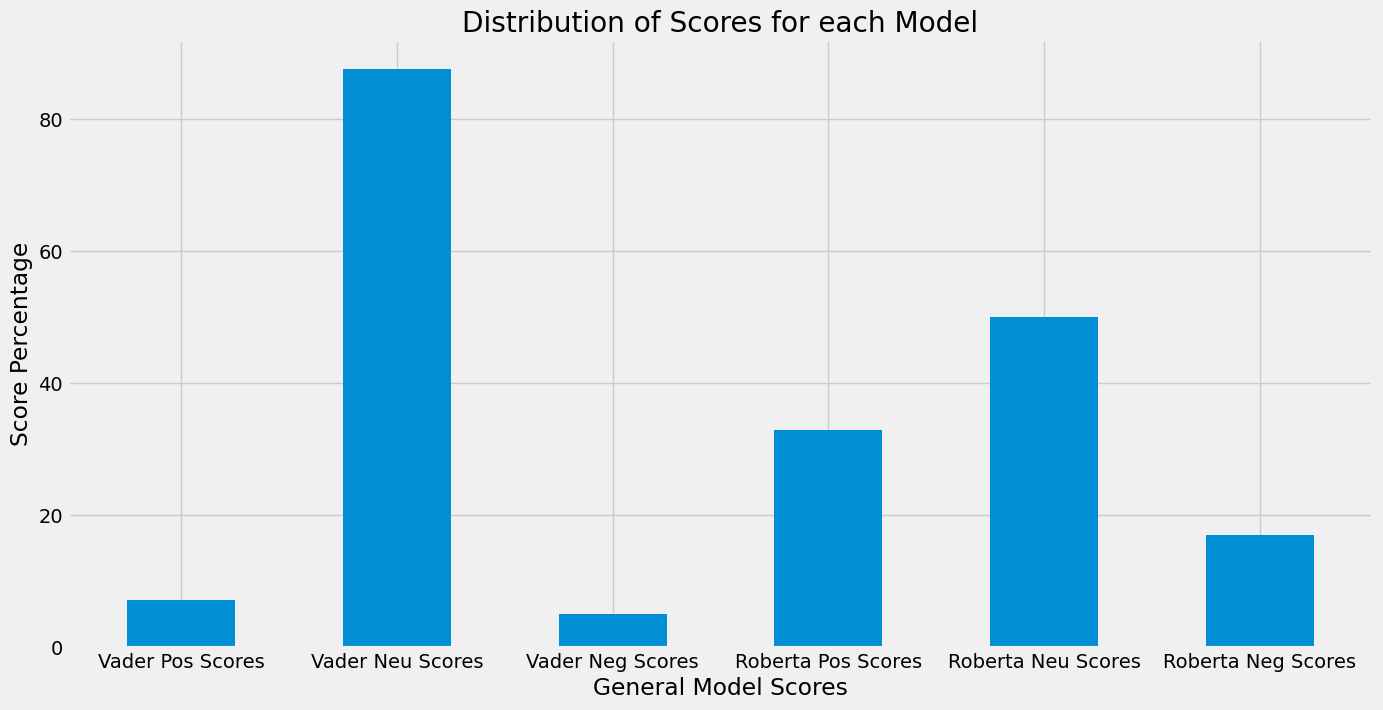

In [28]:
plt.style.use('fivethirtyeight')

data = {'Vader Pos Scores':avg_pos_vader, 'Vader Neu Scores':avg_neu_vader, 'Vader Neg Scores':avg_neg_vader, 
        'Roberta Pos Scores':avg_pos_roberta, 'Roberta Neu Scores':avg_neu_roberta, 'Roberta Neg Scores':avg_neg_roberta
}
gen_scores = list(data.keys())
percentages = list(data.values())
fig = plt.figure(figsize=(15,7.5))
plt.bar(gen_scores, percentages, width=0.5)

plt.xlabel('General Model Scores')
plt.ylabel('Score Percentage')
plt.title('Distribution of Scores for each Model')
plt.show()

<font size="4"> As we can see, the Roberta model gives a more balanced distribution of sentiment scores, which will likely result in more nuanced analysis of the gathered tweets and hopefully better results when used as a feature. 